In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv("./datasets/wine.csv", header=None)
df = df_pre.sample(frac=0.15)

print(df.shape)
df.head()

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12,  activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR) : 
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d} - {val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose = 1, save_best_only=True)

history = model.fit(X,Y,validation_split=0.33, epochs=1000, batch_size=500, callbacks=[checkpointer])

(975, 13)
Epoch 1/1000
1/2 [==============>...............] - ETA: 2s - loss: 14.1559 - accuracy: 0.2720
Epoch 1: val_loss improved from inf to 11.31458, saving model to ./model\01 - 11.3146.hdf5
2/2 [==============================] - 3s 556ms/step - loss: 13.7144 - accuracy: 0.2741 - val_loss: 11.3146 - val_accuracy: 0.2453
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 10.9371 - accuracy: 0.2900

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 11.31458 to 8.31019, saving model to ./model\02 - 8.3102.hdf5
2/2 [==============================] - 0s 162ms/step - loss: 10.8035 - accuracy: 0.2711 - val_loss: 8.3102 - val_accuracy: 0.2422
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 8.2449 - accuracy: 0.2360
Epoch 3: val_loss improved from 8.31019 to 5.30369, saving model to ./model\03 - 5.3037.hdf5
2/2 [==============================] - 0s 196ms/step - loss: 7.9384 - accuracy: 0.2435 - val_loss: 5.3037 - val_accuracy: 0.2143
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 5.4593 - accuracy: 0.2040
Epoch 4: val_loss improved from 5.30369 to 2.55694, saving model to ./model\04 - 2.5569.hdf5
2/2 [==============================] - 0s 174ms/step - loss: 5.0475 - accuracy: 0.2037 - val_loss: 2.5569 - val_accuracy: 0.2516
Epoch 5/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.6439 - accuracy: 0.2180
Epoch 5: val_loss improved from 2.55694 to 0.9491

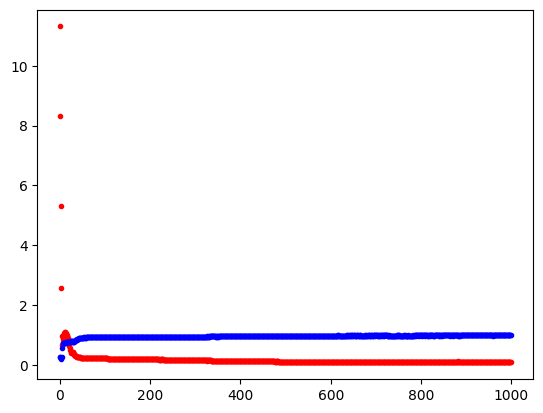

In [6]:
y_vloss = history.history['val_loss']

y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = 'red', markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [8]:
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv("./datasets/wine.csv", header=None)
df = df_pre.sample(frac=0.15)

print(df.shape)
df.head()

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12,  activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR) : 
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d} - {val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X,Y,validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback, checkpointer])

(975, 13)
Epoch 1/3500
1/2 [==============>...............] - ETA: 1s - loss: 17.6681 - accuracy: 0.2720
Epoch 1: val_loss improved from inf to 16.78865, saving model to ./model\01 - 16.7887.hdf5
2/2 [==============================] - 2s 462ms/step - loss: 17.3719 - accuracy: 0.2741 - val_loss: 16.7887 - val_accuracy: 0.2453
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 15.9484 - accuracy: 0.2940
Epoch 2: val_loss improved from 16.78865 to 15.54737, saving model to ./model\02 - 15.5474.hdf5


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 154ms/step - loss: 16.1275 - accuracy: 0.2741 - val_loss: 15.5474 - val_accuracy: 0.2453
Epoch 3/3500
1/2 [==============>...............] - ETA: 0s - loss: 15.2084 - accuracy: 0.2660
Epoch 3: val_loss improved from 15.54737 to 14.34829, saving model to ./model\03 - 14.3483.hdf5
2/2 [==============================] - 0s 142ms/step - loss: 14.9565 - accuracy: 0.2741 - val_loss: 14.3483 - val_accuracy: 0.2453
Epoch 4/3500
1/2 [==============>...............] - ETA: 0s - loss: 14.2325 - accuracy: 0.2660
Epoch 4: val_loss improved from 14.34829 to 13.18808, saving model to ./model\04 - 13.1881.hdf5
2/2 [==============================] - 0s 142ms/step - loss: 13.8127 - accuracy: 0.2741 - val_loss: 13.1881 - val_accuracy: 0.2453
Epoch 5/3500
1/2 [==============>...............] - ETA: 0s - loss: 12.5740 - accuracy: 0.2840
Epoch 5: val_loss improved from 13.18808 to 12.06268, saving model to ./model\05 - 12.0627.hdf5
2/2 [=============================